# Exploratory Data Analysis on Welltory COVID-19 and Wearables Dataset
**Authors:** Aditya Raju and Mariam Khan  
**Date:** September 24th, 2024

### Dataset Introduction
In this notebook, we will be performing an EDA on the Welltory COVID-19 and Wearables Open Research dataset. The dataset is available [here](https://github.com/Welltory/hrv-covid19/tree/master).

### Data Context
The Welltory COVID-19 and Wearables Open Data Research dataset is a collection of physiological and behavioral data obtained from wearable devices. The dataset includes heart rate, physical activity, and other health-related metrics. Some limitations in the data include missing data, duplicate data, and small sample sizes. The data was collected during the COVID-19 pandemic which helps understand the impact a global pandemic has on behavioral and physiological health.

### Data Sampling
To perform EDA on the Welltory dataset, the data should be cleaned before any operations are performed on it. This includes removing missing values, handling duplicates, and handling outliers. Although this data provides valuable insights, this may not be representative of the whole population as there are many without wearable devices. Additionally, there will be a level of variance across wearable devices that individuals are using such as Apple or Garmin. Finally for the purposes of EDA, there isn't a need to split between training and test data as we are not creating predictive models. 

In [131]:
!pip3 install scikit-learn

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

#Increase display width
pd.set_option('display.width', 200)

In [110]:
#read csv files into dataframes
participants = pd.read_csv('../aipi510-fall24/data/participants.csv')
heart_rate = pd.read_csv('../aipi510-fall24/data/heart_rate.csv')

In [133]:
print(participants)
print(heart_rate)

      user_code gender age_range           city        country  height   weight symptoms_onset   bmi bmi_category
1    013f6d3e5b      f     18-24      São Paulo         Brazil  174.00   77.300      5/15/2020  25.5   overweight
2    01bad5a519      m     45-54  St Petersburg         Russia  178.00   92.000       4/5/2020  29.0   overweight
3    0210b20eea      f     25-34          Sochi         Russia  169.00   60.000       5/6/2020  21.0       normal
4    024719e7da      f     45-54  St Petersburg         Russia  158.00   68.500      5/27/2020  27.4   overweight
9    0bdfbddb2b      f     18-24       Teren'ga         Russia  159.00   73.500       4/1/2020  29.1   overweight
..          ...    ...       ...            ...            ...     ...      ...            ...   ...          ...
178  f9edcb7056      f     65-74         Folsom  United States  154.94  130.300      3/16/2020  54.3        obese
179  fcf3ea75b0      f     45-54         Moscow         Russia  168.00   92.644       5/

### Data Structure, Descriptive Statistics, and Data Quality

In [134]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(participants.head())

# Display the structure of the DataFrame
print("\nStructure of the DataFrame:")
print(participants.info())

# Display descriptive statistics
print("\nDescriptive statistics of the DataFrame:")
print(participants.describe())

# Display Data Types
print("\nData types of each column:")
print(participants.dtypes)

# Display the column names
print("\nColumn names in the DataFrame:")
print(participants.columns)

# Display Duplicates
print("\nNumber of duplicate rows:")
print(participants.duplicated().sum())

# Display Missing Values
print("Missing values in each column:")
print(participants.isnull().sum())


First few rows of the DataFrame:
    user_code gender age_range           city country  height  weight symptoms_onset   bmi bmi_category
1  013f6d3e5b      f     18-24      São Paulo  Brazil   174.0    77.3      5/15/2020  25.5   overweight
2  01bad5a519      m     45-54  St Petersburg  Russia   178.0    92.0       4/5/2020  29.0   overweight
3  0210b20eea      f     25-34          Sochi  Russia   169.0    60.0       5/6/2020  21.0       normal
4  024719e7da      f     45-54  St Petersburg  Russia   158.0    68.5      5/27/2020  27.4   overweight
9  0bdfbddb2b      f     18-24       Teren'ga  Russia   159.0    73.5       4/1/2020  29.1   overweight

Structure of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 1 to 184
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_code       136 non-null    object 
 1   gender          136 non-null    object 
 2   age_range       136 non-null 

In [135]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(heart_rate.head())

# Display the structure of the DataFrame
print("\nStructure of the DataFrame:")
print(heart_rate.info())

# Display descriptive statistics
print("\nDescriptive statistics of the DataFrame:")
print(heart_rate.describe())

# Display Data Types
print("\nData types of each column:")
print(heart_rate.dtypes)

# Display the column names
print("\nColumn names in the DataFrame:")
print(heart_rate.columns)

# Display Duplicates
print("\nNumber of duplicate rows:")
print(heart_rate.duplicated().sum())

# Display Missing Values
print("Missing values in each column:")
print(heart_rate.isnull().sum())

First few rows of the DataFrame:
    user_code             datetime  heart_rate  is_resting
0  007b8190cf  2020-04-26 04:49:25          70           0
1  01bad5a519  2020-04-23 06:21:03          74           0
2  01bad5a519  2020-04-23 09:46:01          82           0
3  01bad5a519  2020-04-23 14:05:06          90           0
4  01bad5a519  2020-04-24 03:41:18          72           0

Structure of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 519981 entries, 0 to 523782
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_code   519981 non-null  object
 1   datetime    519981 non-null  object
 2   heart_rate  519981 non-null  int64 
 3   is_resting  519981 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 19.8+ MB
None

Descriptive statistics of the DataFrame:
          heart_rate     is_resting
count  519981.000000  519981.000000
mean       90.272879       0.005587
std        24.156117       

##### Interpretation of Data Structures, Descriptive Statistics, and Data Quality
The cells above in this section all return valuable information for the data structure, quality, and statistics prior to any preprocessing being done. Each cell represents each of the heart_rate and participants csv's. For example, the participants.csv file contains 40 total missing values while the heart_rate.csv contains none. Furthermore when checking the data types of the two csv's, one is "int" and objects while the other is just "int." From this, you can see that the data quality in raw format is not ideal for data transformations. With attributes missing or duplicating values, analysis cannot be done accurately which stresses the importance of preprocessing. The size difference is also important which indicates that a particular participat has multiple entries for different dates within the heart_rate.csv file.

### Variable Relationships

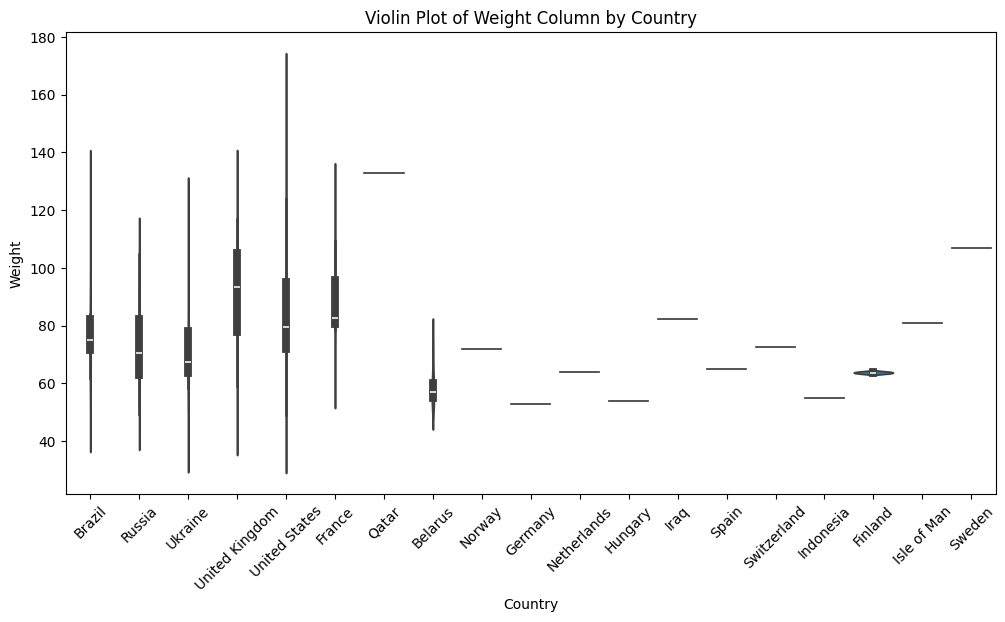

In [136]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='country', y='weight', data=participants)
plt.title('Violin Plot of Weight Column by Country')
plt.xlabel('Country')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()

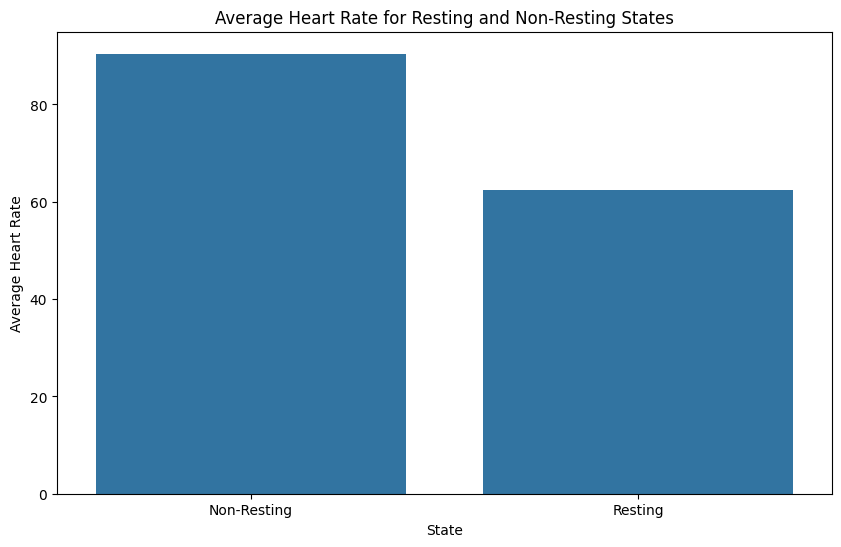

In [137]:
average_heart_rate = heart_rate.groupby('is_resting')['heart_rate'].mean().reset_index()
average_heart_rate['is_resting'] = average_heart_rate['is_resting'].map({0: 'Non-Resting', 1: 'Resting'})

plt.figure(figsize=(10, 6))
sns.barplot(x='is_resting', y='heart_rate', data=average_heart_rate)
plt.title('Average Heart Rate for Resting and Non-Resting States')
plt.xlabel('State')
plt.ylabel('Average Heart Rate')
plt.show()


##### Interpretation of Variable Relationships
The first chart is a Violin Chart representing the relationship between the country and weight attribute. This was selected as many times we hear that fast food is a major contributer to weight gain in the United States. From the chart we see that United States has the second largest "whiskers" from the box plot which shows that there is greater deviation in the weight within the country. A takeaway from this is that the US has individuals that weigh similar to other countries excluding Indonesia on the lower-end, but surpasses all other countries on the higher-end. 

The second chart is a bar graph representing the relationship between average heart_rate and resting vs. non-resting states. The dataset contains heart_rate values along with 0's and 1's for is_resting indicatiing true or false. Based on the diagram created, we can see that the average non-resting heart rate is slightly above 85 while the average resting heart rate is around 60. 

### Data Preprocessing

In [138]:
# Remove null values from the datebases
participants = participants.dropna()
heart_rate = heart_rate.dropna()

In [139]:
#Remove outliers from heart_rate dataframe
HR_Q1 = heart_rate['heart_rate'].quantile(0.25)
HR_Q3 = heart_rate['heart_rate'].quantile(0.75)
HR_IQR = HR_Q3 - HR_Q1
hr_lower_bound = HR_Q1 - 1.5 * HR_IQR
hr_upper_bound = HR_Q3 + 1.5 * HR_IQR

heart_rate = heart_rate[(heart_rate['heart_rate'] >= hr_lower_bound) & (heart_rate['heart_rate'] <= hr_upper_bound)]

print(heart_rate)

         user_code             datetime  heart_rate  is_resting
0       007b8190cf  2020-04-26 04:49:25          70           0
1       01bad5a519  2020-04-23 06:21:03          74           0
2       01bad5a519  2020-04-23 09:46:01          82           0
3       01bad5a519  2020-04-23 14:05:06          90           0
4       01bad5a519  2020-04-24 03:41:18          72           0
...            ...                  ...         ...         ...
523778  fe5ca7e4ea  2020-05-23 06:31:33          85           0
523779  fe6c1b1349  2020-05-07 12:05:04          68           0
523780  fe6c1b1349  2020-05-10 06:32:00          70           0
523781  fe6c1b1349  2020-05-12 06:31:42          77           0
523782  fe6c1b1349  2020-05-15 06:31:35          80           0

[519374 rows x 4 columns]


### Visualizations

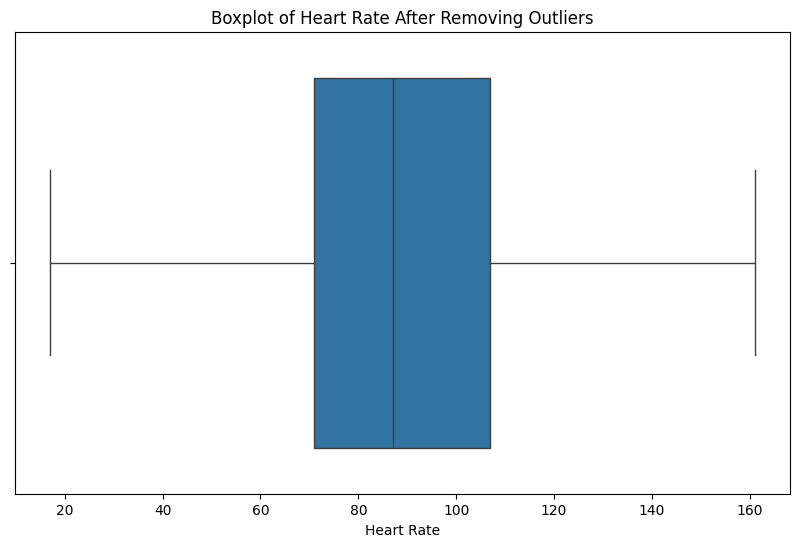

In [140]:
#Box Plot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_rate['heart_rate'])
plt.title('Boxplot of Heart Rate After Removing Outliers')
plt.xlabel('Heart Rate')
plt.show()

The boxplot displays the distribution of heart rate data after removing the outliers. The center line indicates the median heart rate and the edges of the box indicate the first (Q1) and third (Q3) quartile, highlighting where the middle 50% of values lie. The whiskers extend to the minimum and maximum heart rates within 1.5 times the interquartile range. 

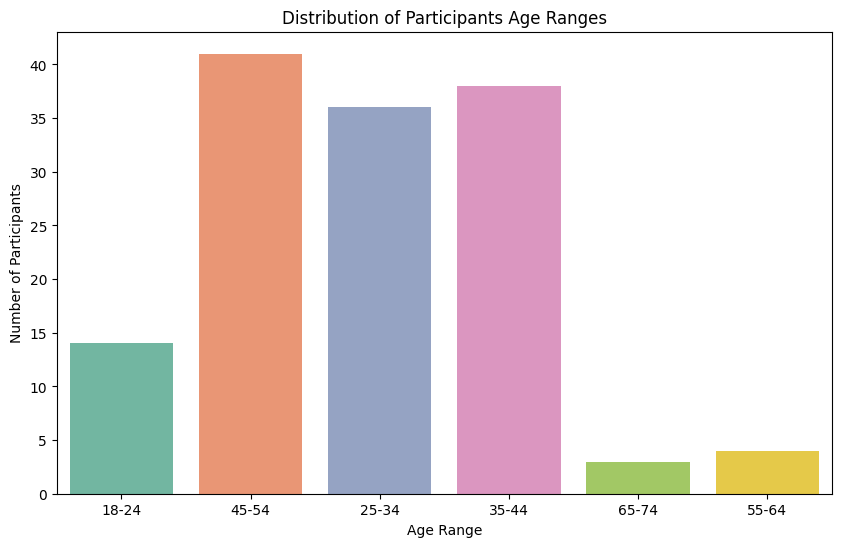

In [143]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create bar plot of participants' age ranges
sns.countplot(data=participants, x='age_range', hue = 'age_range', palette='Set2')

# Set plot labels and title
plt.title("Distribution of Participants Age Ranges")
plt.xlabel("Age Range")
plt.ylabel("Number of Participants")


plt.show()

The histogram displays the distribution of participants across different age ranges with the x-axis representing the various age ranges and the y-axis showing the number of participants in each range. The age group with the most participants is 45-54 years old and the age group with the least participants is 65-74 years old.

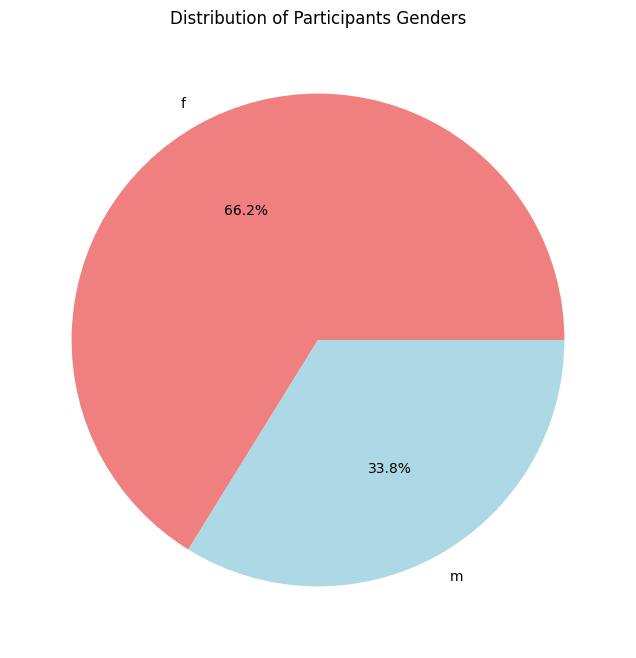

In [144]:
# Count the number of participants by gender
gender_counts = participants['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])

#Set plot title
plt.title("Distribution of Participants Genders")

plt.show()

The pie chart illustrates the distribution of participants by gender, showing the proportions of each gender within the study. The pie chart shows that about 2/3 of the of the parcipants were female and about 1/3 were male.

### New Feature

In [145]:
#calculate the bmi for each participant and add to a new column
participants['bmi'] = round(participants['weight'] / ((participants['height']/100) ** 2), 1)

#function to categorize bmi
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'normal'
    elif 25 <= bmi <= 29.9:
        return 'overweight'
    else:
        return 'obese'

#new column with bmi categories
participants['bmi_category'] = participants['bmi'].apply(categorize_bmi)
participants.head(20)

,user_code,gender,age_range,city,country,height,weight,symptoms_onset,bmi,bmi_category
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.00,77.300,5/15/2020,25.5,overweight
2,01bad5a519,m,45-54,St Petersburg,Russia,178.00,92.000,4/5/2020,29.0,overweight
3,0210b20eea,f,25-34,Sochi,Russia,169.00,60.000,5/6/2020,21.0,normal
4,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,5/27/2020,27.4,overweight
9,0bdfbddb2b,f,18-24,Teren'ga,Russia,159.00,73.500,4/1/2020,29.1,overweight
11,0f2d7af30c,f,25-34,Bila Tserkva,Ukraine,164.00,65.100,3/10/2020,24.2,normal
13,128d2c7888,m,25-34,Moscow,Russia,170.00,57.000,3/27/2020,19.7,normal
16,17ec33e320,f,35-44,Fleetwood,United Kingdom,152.00,69.173,4/10/2020,29.9,overweight
17,18c4ac7b38,f,35-44,Moscow,Russia,167.00,63.000,4/10/2020,22.6,normal
18,18f2738516,m,45-54,Moscow,Russia,176.00,70.500,4/19/2020,22.8,normal


##### New Feature Discussion
Body Mass Index (BMI) is an approximate indicator of body fat. While it is not an exact science as it does not account for muscle weight or fat distribution, BMI can be used to predict a persons likelihood of developing heart disease or other heart issues.

We used the height and weight measurments of each participant to calculate their BMI. The formula to calculate BMI is:  
$bmi = {{weight (kg)}\over{height (m)^2}}$  

We then used the BMI to categorize each participant as *underweight, normal, overweight*, or *obese*. 

### Dimensionality Reduction

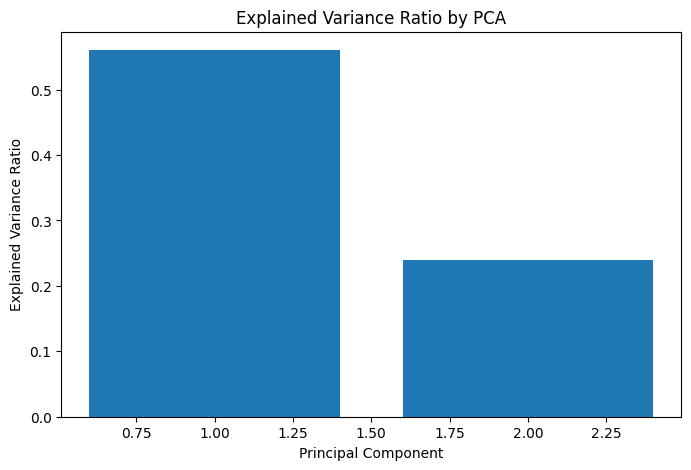

In [146]:
# Creating new variables from CSV to include all data
participants_csv = pd.read_csv('../aipi510-fall24/data/participants.csv')
heart_rate_csv = pd.read_csv('../aipi510-fall24/data/heart_rate.csv')

# Combining both csv's on "user_code" attribute
combined_df = pd.merge(heart_rate_csv, participants_csv, on='user_code')

# Encoding "gender" column to make it numerical
encoder = LabelEncoder()
combined_df['gender'] = encoder.fit_transform(combined_df['gender'])

# Setting numerical values and dropping nulls
numerical_columns = ['height', 'weight', 'gender', 'heart_rate']
X = combined_df[numerical_columns].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by PCA')
plt.show()


##### Dimensionality Discuss
We used PCA on the combined participants and heart rate dataset provides insightful results. Initially, the dataset was merged on the user_code column, combining demographic and health-related information. The gender column was encoded to numerical values to facilitate the PCA process. The selected numerical columns for PCA included height, weight, gender, and heart_rate. After these attributes were standardized, PCA was applied to reduce the dimensionality to two principal components. The "Explained Variance by PCA" plot shows the proportion of variance for each principal component. The first component had the greater proportion of variance while the second had a smaller amount.

### Data Quality Assessment Discussion

**For the purpose of this discussion, we will refer to participants.csv*

##### **Data Profiling**
It is important to examine the dataset to understand its structure, content, and interrelationships. Within the *participants.csv* file, the columns are **user_code**, **gender**, **age_range**, **city**, **country**, **height**, **weight**, and **symptoms_onset**. Each of the columns have their own data types and it is important to analyze this prior to making any transformations and doing analysis on the dataset.

##### **Data Completeness**
Going through the dataset and finding gaps is integral prior to doing any analysis on the data as many techniques may be affected. For example, the *participants.csv* dataset contains missing values in the **city**, **height**, and **symptoms_onset** columns. This is important to be handled because numerical columns are critical for PCA and if not handled correctly, analysis will be inaccurate.

##### **Data Accuracy**
Accuracy ensures that the metrics collected are reasonable to real-world scenarios/situations. For example, **height** and **weight** metrics should be plausible values for humans. If there are anomalies in the values, it should be addressed immediately when preprocessing.

##### **Data Consistency**
Data consistency refers to the uniformity and reliablity of the data. It is essential for reliable analysis and interpretation because discrepencies in data could lead to inaccurate results and conclusions.

##### **Data Integrity**
Data integrity entails that data is accurate and reliable over its lifetime. Maintaining data integrity is crucial to ensure trustworthy analysis. When referencing *participants.csv*, an example of this is to make sure that **user_code** is unique and not duplicated and outliers are removed to ensure that it doesn't represent the majority.

##### **Data Lineage and Provenance**
Data lineage and provenance is important when tracing data back to how it was obtained, when it was collected, and if it was done truthfully. Clear lineage and provenance is important to producers and consumers to help validate data and maintain transparency.






